# 3D (x-y-t) field generation and lagrangian simulation: velocity field generation


In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import dask.array as da

import xrft

import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

from gptide import cov
from gptide import GPtideScipy
from gptide import stats as gpstats

import utils as ut
day = 86400

In [2]:
from dask.distributed import Client
client = Client()
client

<Client: 'tcp://127.0.0.1:64202' processes=4 threads=4, memory=16.00 GiB>

## Generate velocity fields

The different flow formulations considered are:

1. direct velocity field generation: $u$ and $v$ specified independantly and with separable autocorrelations (x/y/t).
2. streamfunction and potential field generation: $u=-\partial_y \psi + \partial_x \phi$ and $v=\partial_x \psi + \partial_y \phi$, where $\psi$ and $\phi$ are independent fields with separable autocorrelations.

Fields are generated with 2. here

**Points addressed:**

- kinetic energy spectral slopes need to match general expectation of isotropic wavenumber spectral slope between -3 and -2.
- separability implies non-isotropic spatial spectra and weird deformation (e.g. vorticity, divergence) fields, we opt for isotropic formulation

**Points to potentially in the future address:**

- $\psi$ $\phi$ correlations have been considered in the past, see mention of spirality in [Wang and Buhler 2021]
- could we make the problem 2D periodic?

**Note:** Link Matern parameters ($\nu$, n=1) to spectral slope $s$ ($k^{-s}$): $s=2\nu+n$.

In [3]:
#### 
# These are our kernel input parameters
np.random.seed(1)

# signal characteristics
η = .2
λx = 100   # km
λy = 100   # km
λt = 5     # days

# noise:
#noise = 0.01
noise = 0. # noise will be added to observations just before inference

## velocity field formulation
#kind = "uv"
#amplitudes = (η, η)
#suffix = kind
## psi-phi field formulation
kind = "pp"
alpha = 0.
amplitudes = (η*(1-alpha), η*alpha)
# rescale amplitudes for psi, phi formulation
if kind=="pp":
    λ = np.sqrt(λx**2 + λy**2)
    scale = λ*0.5
    amplitudes_no_rescaling = amplitudes
    amplitudes = (scale * amplitudes[0], scale * amplitudes[1])
else:
    scale = 1.
    
###
# Domain size parameters
Nx = 1000
Ny = 1000
Nt = 60*2

### dev
#λx = 10   # km
#λy = 10   # km
#Nx = 100
#Ny = 50
#Nt = 10*2

# output grid spacing
dx = 1.  # km
dy = 1.  # km
dt = 0.5 # days

In [4]:
def compute_plot_mode(model):
    C, X, N, isotropy = ut.generate_covariances(model, Nx, Ny, Nt, dx, dy, dt, λx, λy, λt)
    ds = ut.generate_uv(kind, N, C, X, amplitudes, noise, time=False, isotropy=isotropy)
    ut.plot_snapshot(ds)
    ut.plot_spectra(ds, "psi", yref=1e2)
    return ds

Covariance model = matern2_iso
(10000, 10000)


/Users/aponte/Code/gptide/gptide/cov.py:98: RuntimeWarning: invalid value encountered in multiply
  K *= K_nu(nu,cff1)
/Users/aponte/.miniconda3/envs/pynsitu/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


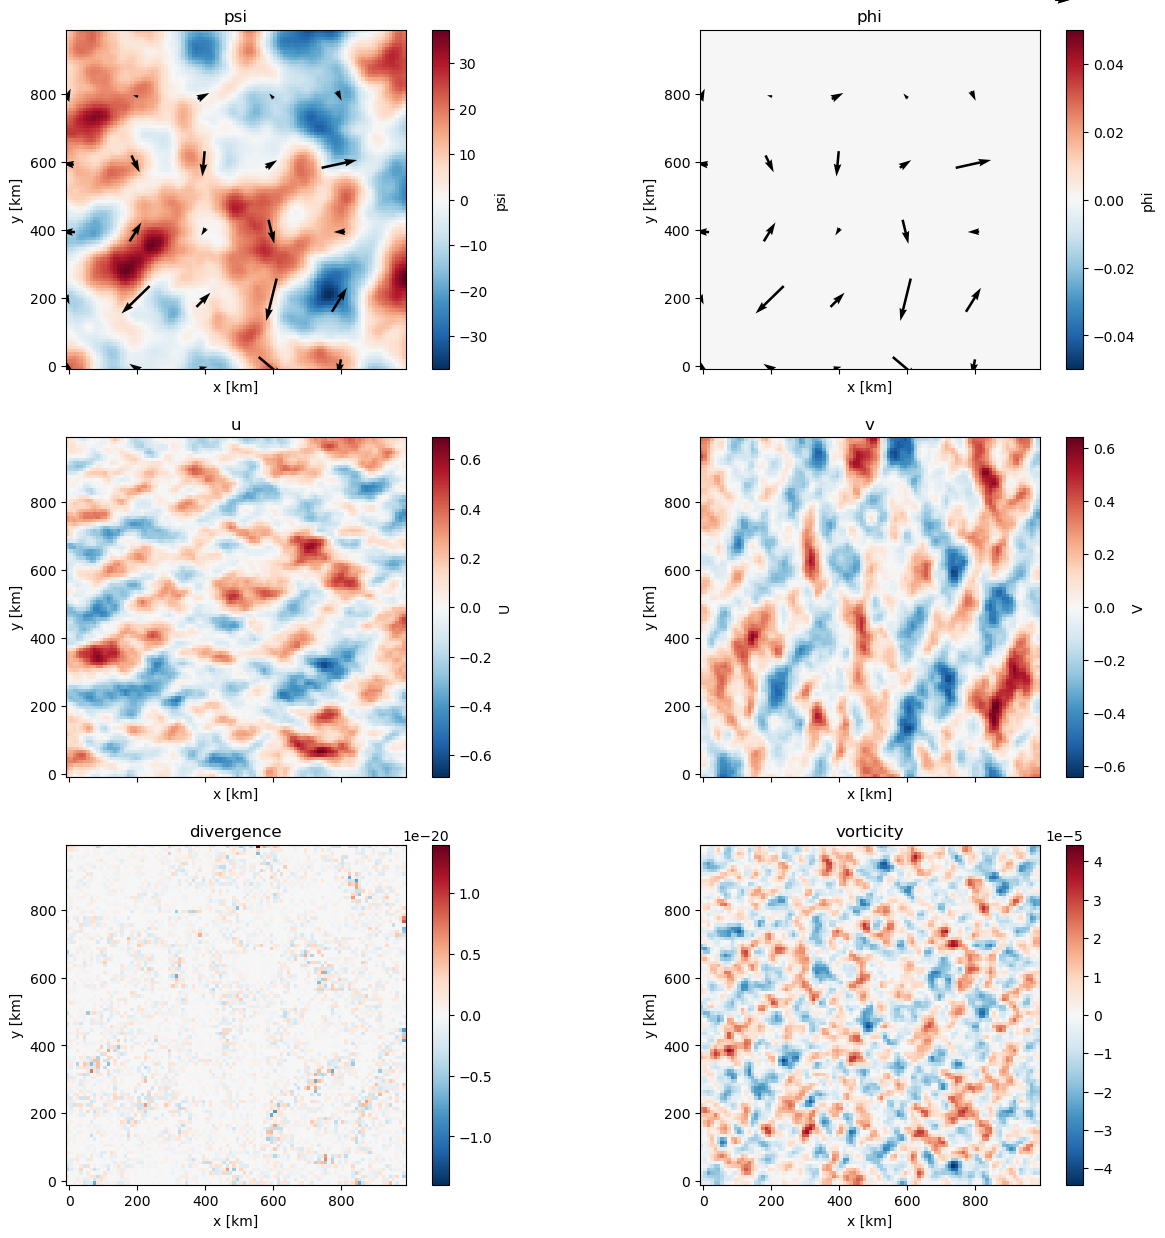

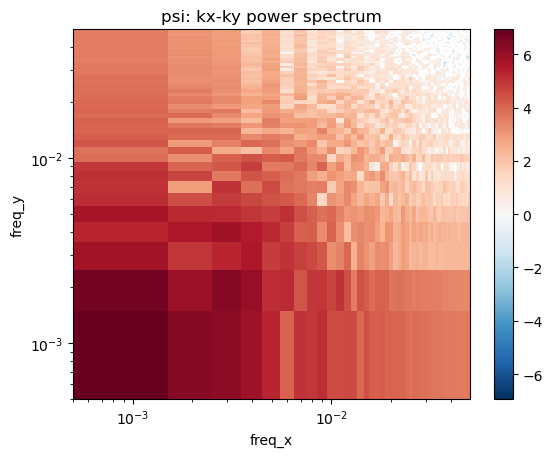

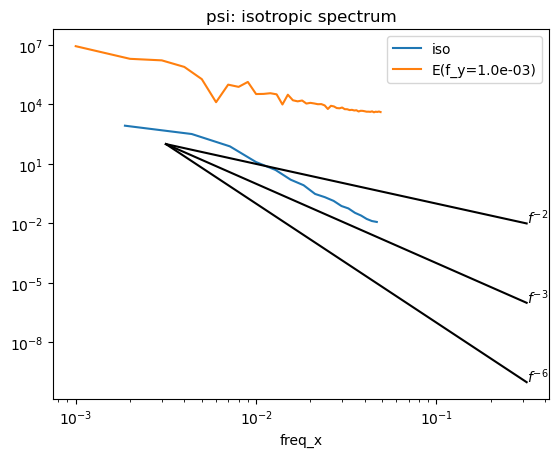

In [5]:
compute_plot_mode("matern2_iso");

Covariance model = expquad_xy


/Users/aponte/.miniconda3/envs/pynsitu/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


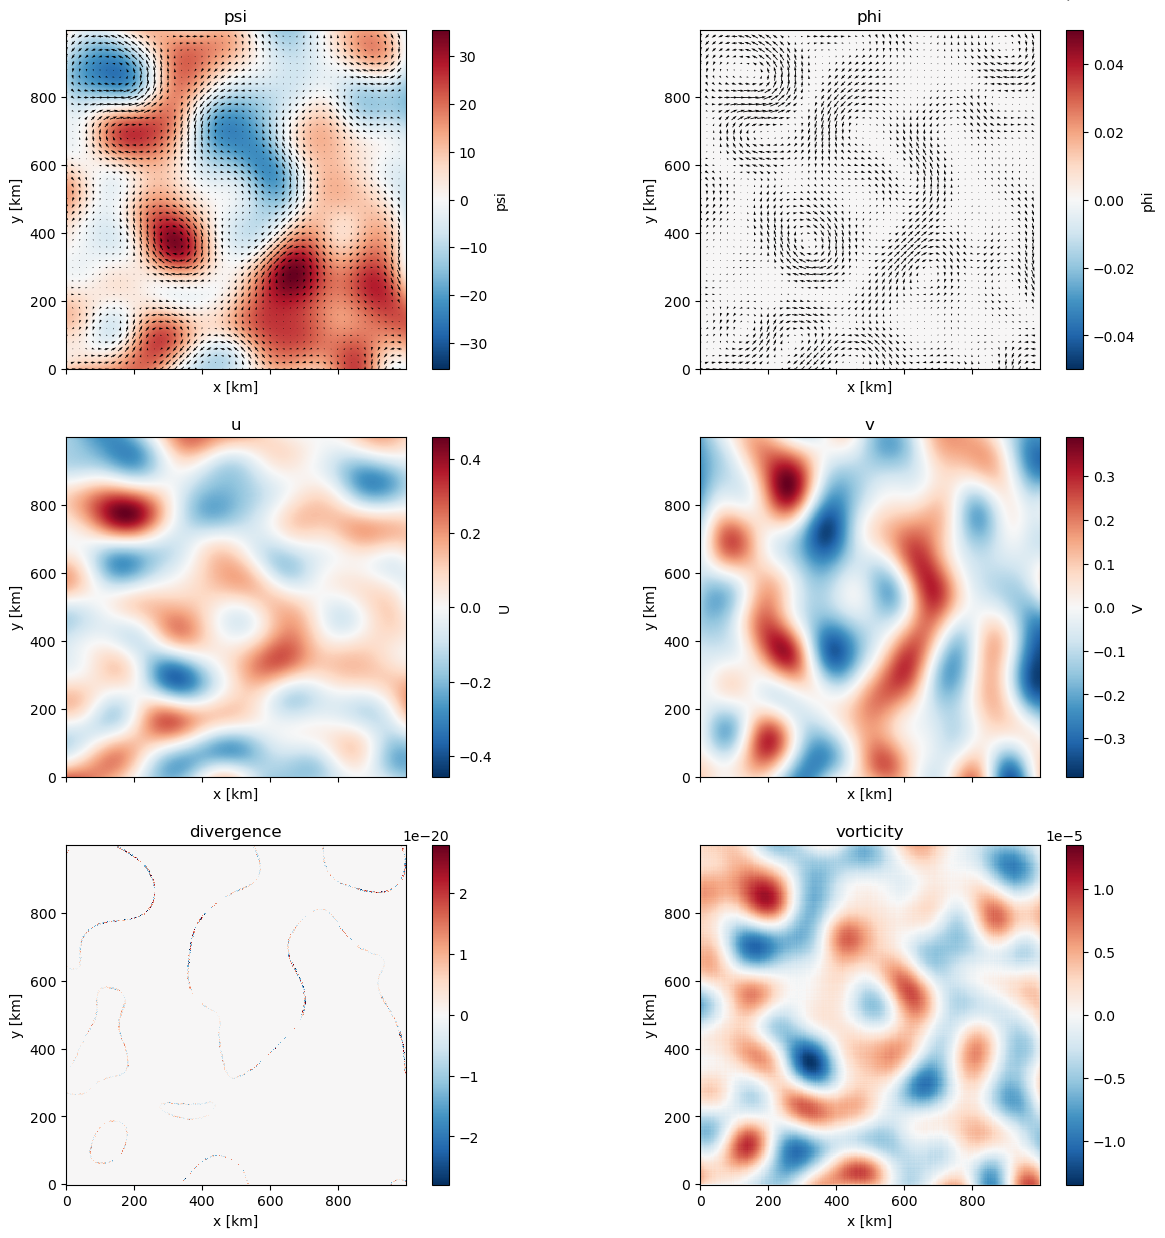

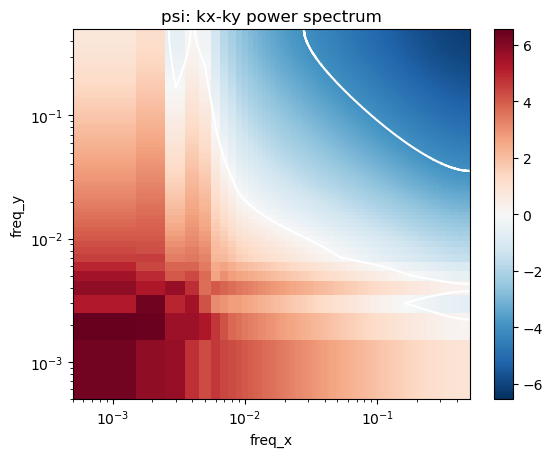

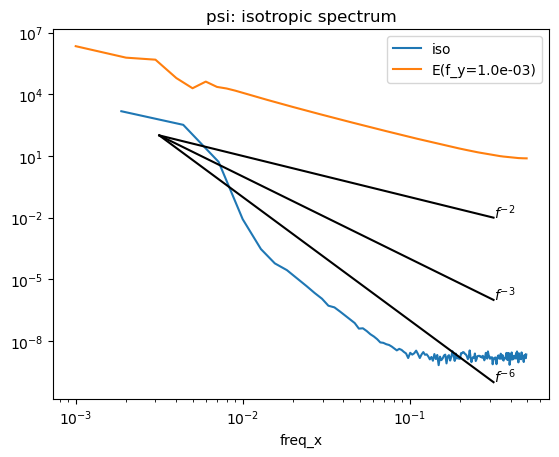

In [6]:
ds = compute_plot_mode("expquad_xy")

Covariance model = matern52_xy


/Users/aponte/.miniconda3/envs/pynsitu/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


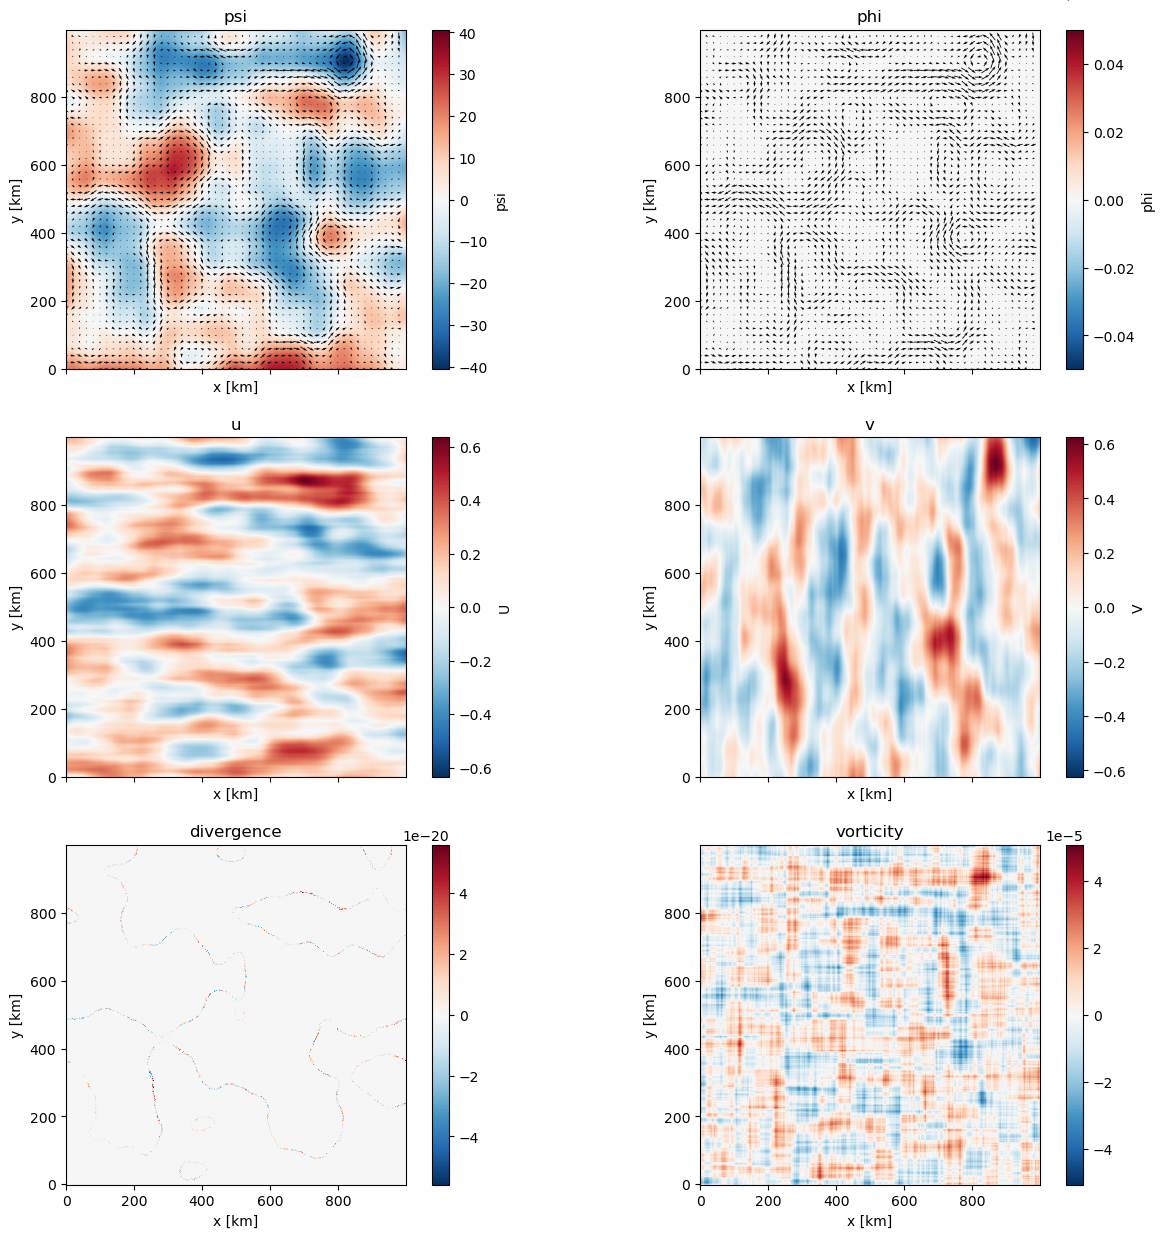

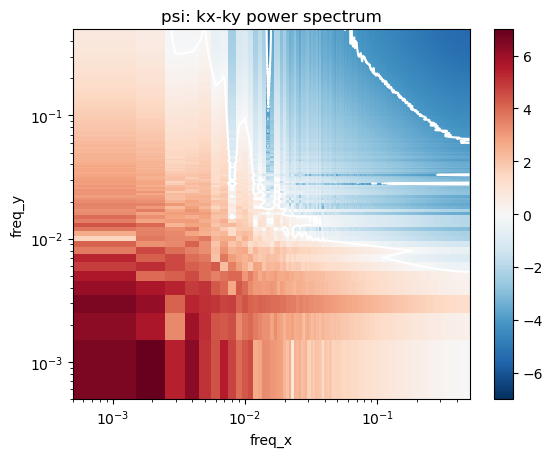

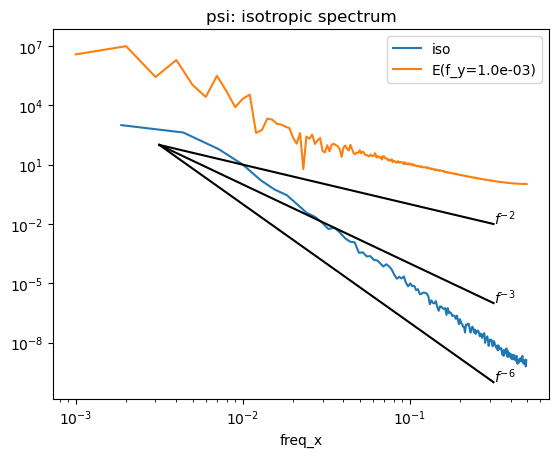

In [7]:
ds = compute_plot_mode("matern52_xy")

Covariance model = matern2_xy


/Users/aponte/Code/gptide/gptide/cov.py:98: RuntimeWarning: invalid value encountered in multiply
  K *= K_nu(nu,cff1)
/Users/aponte/.miniconda3/envs/pynsitu/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


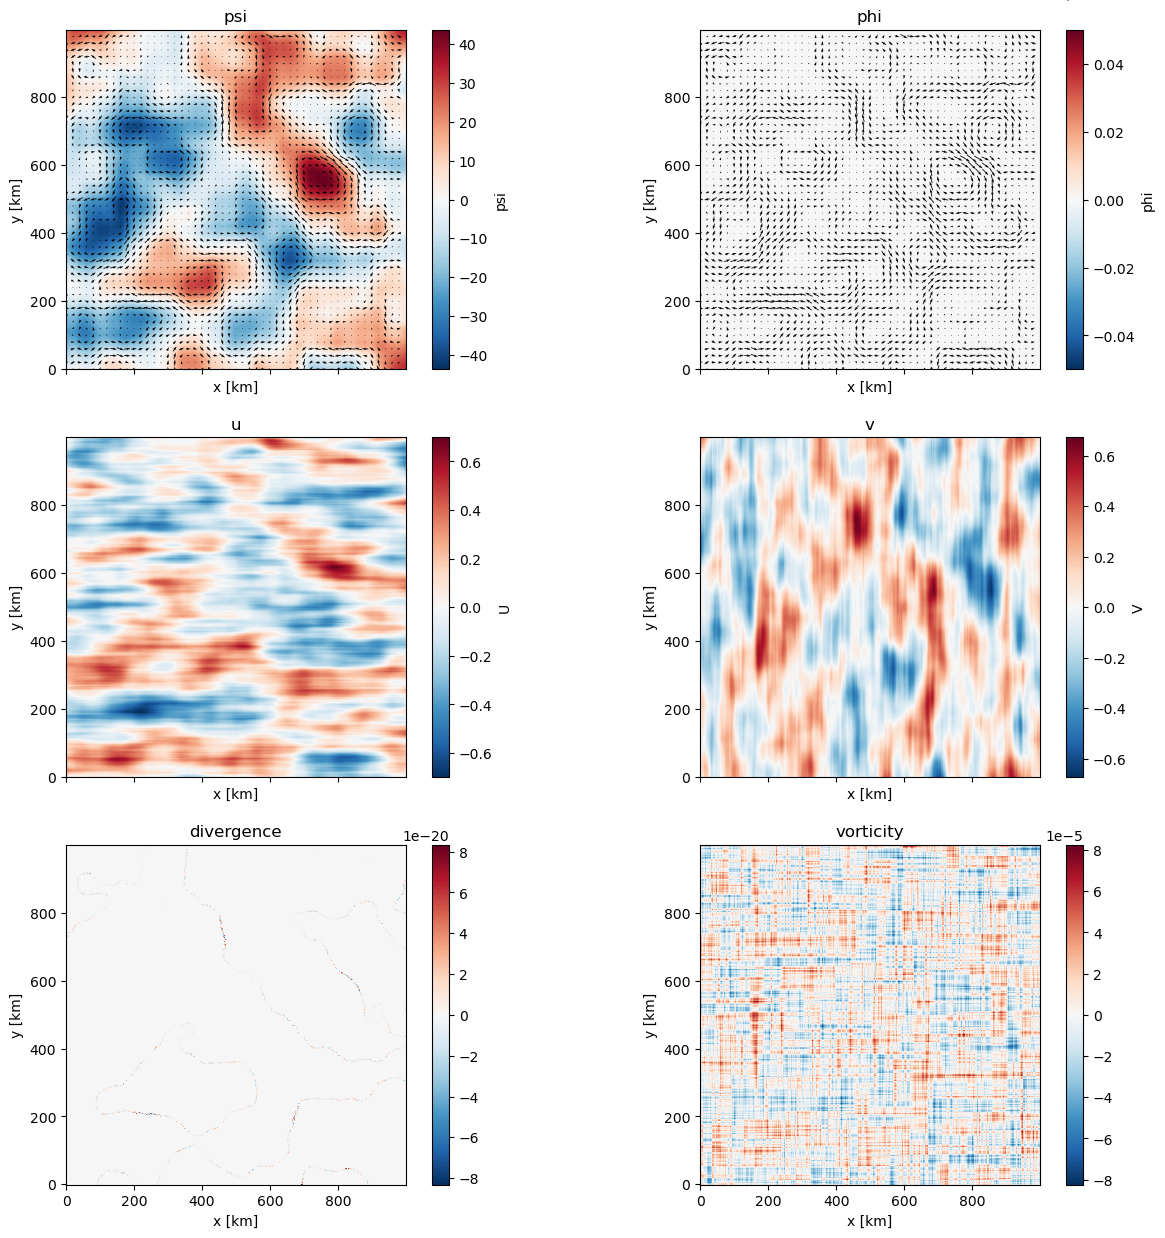

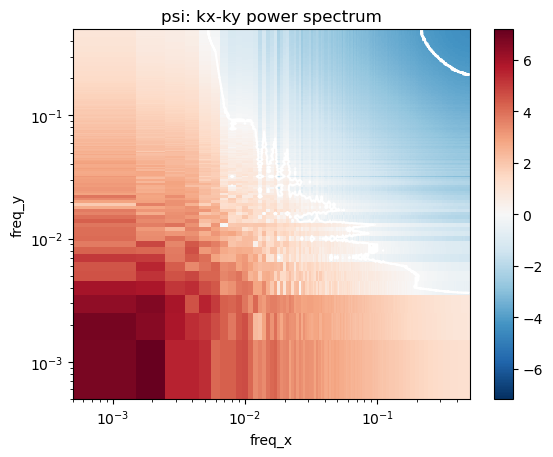

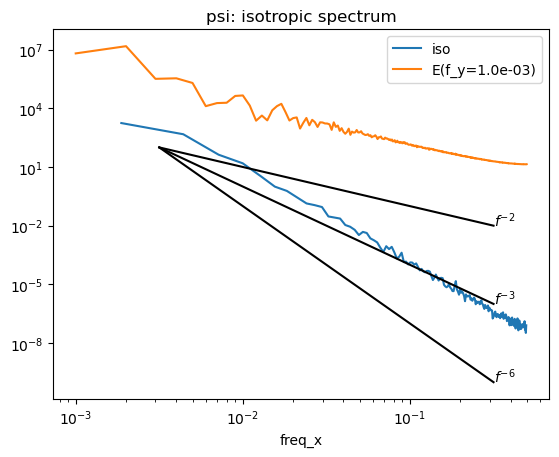

In [8]:
ds = compute_plot_mode("matern2_xy")

Covariance model = matern12_xy


/Users/aponte/.miniconda3/envs/pynsitu/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


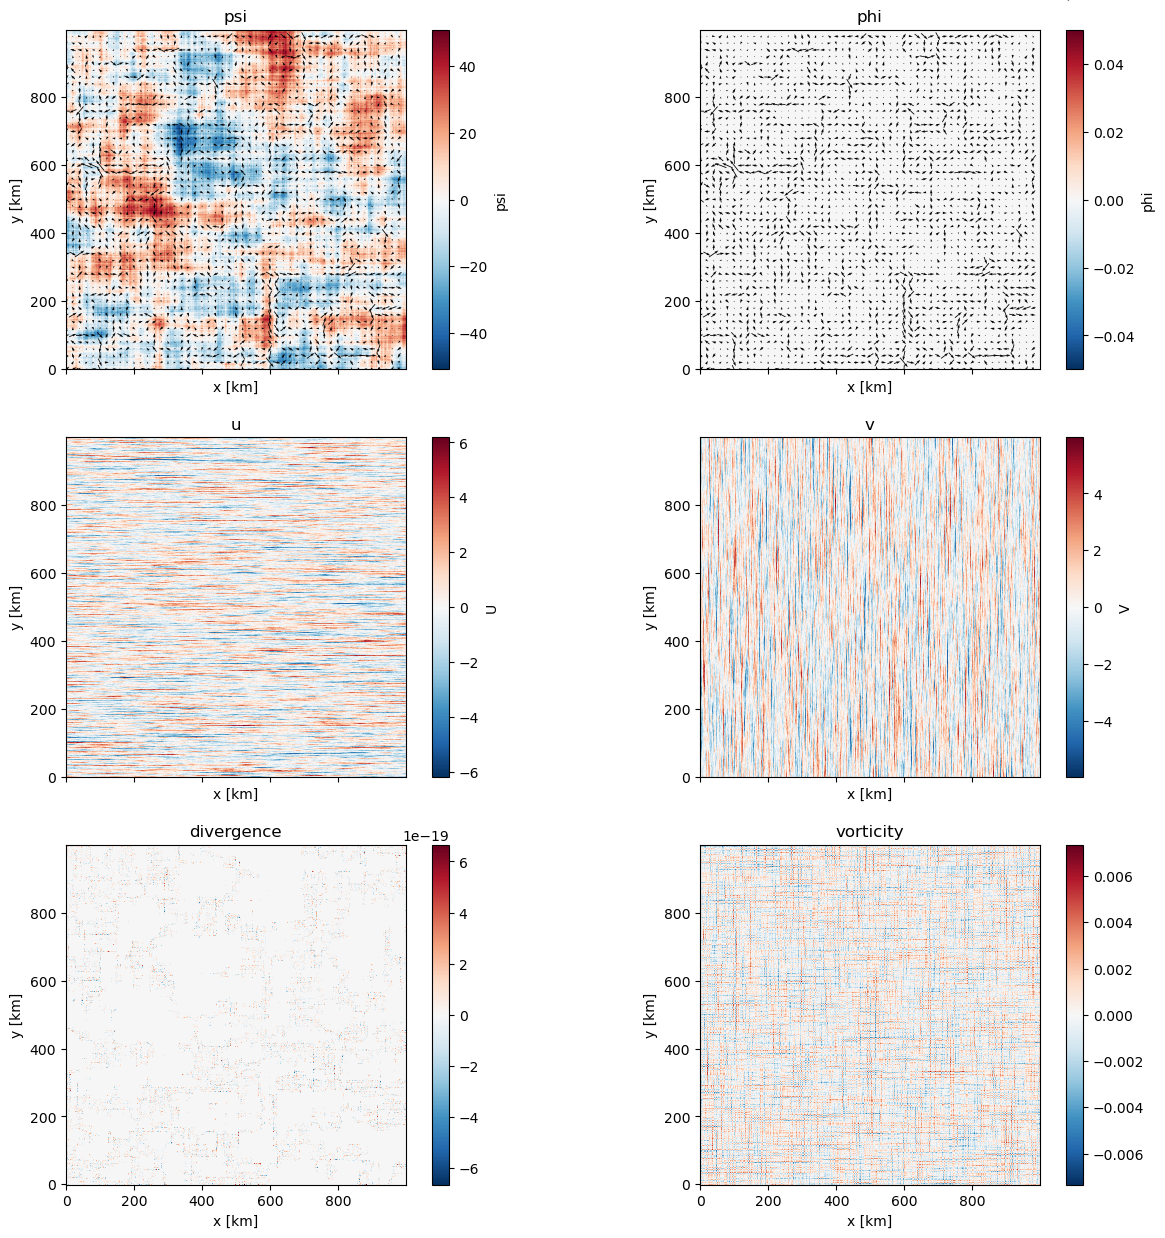

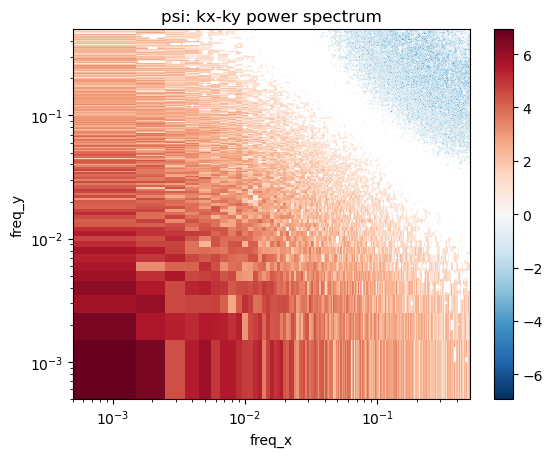

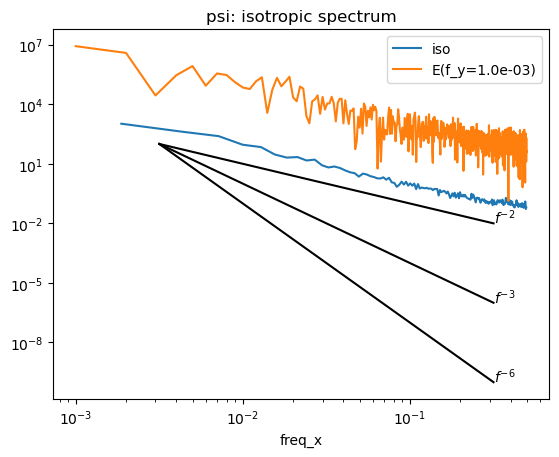

In [9]:
ds = compute_plot_mode("matern12_xy")